<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px">

## Timeseries properties and modeling

Week 12 | Lesson 2.1

---

We will be using historical, quarterly unemployment data to examine the modeling of timeseries. Below we will cover:

- "Rolling" statistics through time, such as the rolling mean.
- Exponentially weighted statistics.
- Differences and stationarity.
- Autocorrelation and partial autocorrelation.
- Autoregressive models.
- Moving average models.
- ARMA and ARIMA models.


In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [238]:
# load data into a dataframe called 'data'
data_path = '~/DSI-SF-5/datasets/unemployment_timeseries/seasonally-adjusted-quarterly-us.csv'

In [239]:
data = pd.read_csv(data_path)

In [240]:
data.head()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [36]:
# rename the columns to 'year_quarter' and 'unemployment_rate'

# use the .map method to replace '%' with an empty space

# drop nan's

# save results to original dataframe named 'data'

In [37]:
# your results should look like this
data.head()

,year_quarter,unemployment_rate
0,1948Q1,3.733
1,1948Q2,3.667
2,1948Q3,3.767
3,1948Q4,3.833
4,1949Q1,4.667


In [241]:
# sanity check your results by checking the datatypes 


In [39]:
data['date'] = pd.to_datetime(data.year_quarter).dt.to_period('Q')
data.set_index('date', inplace=True)
data.head()

,year_quarter,unemployment_rate
date,,
1948Q1,1948Q1,3.733
1948Q2,1948Q2,3.667
1948Q3,1948Q3,3.767
1948Q4,1948Q4,3.833
1949Q1,1949Q1,4.667


In [1]:
# plot the unemployment rate


---

### Parameters for `rolling` functions

**`rolling().mean()`** (as well as **`rolling().median()`**) can take these parameters:

- the first is the series to aggregate
- **`window`** is the number of days to include in the average
- **`center`** is whether the window should be centered on the date or use data prior to that date
- **`freq`** is on what level to roll-up the averages to (as used in **`resample`**). Either **`D`** for day, **`M`** for month or **`A`** for year, etc.



http://stackoverflow.com/questions/17001389/pandas-resample-documentation

In [ ]:
# lets explore how the resmapling and rolling mean methods work piece-by-piece 

In [42]:
# A --> year end frequency
yearly = data['unemployment_rate'].resample('A').mean().rolling(window=3).mean()
yearly.head()

date
1948         NaN
1949         NaN
1950    5.002833
1951    4.847333
1952    3.838917
Freq: A-DEC, Name: unemployment_rate, dtype: float64

In [43]:
# notice that as we take the mean of points within a window, we decrease the total number of points in the dataset
yearly.shape, data.shape

((44,), (174, 2))

In [ ]:
# explore .index and .to_timestamp

In [44]:
date_ticks_orig = data.index.to_timestamp()
date_ticks_roll = yearly.index.to_timestamp()

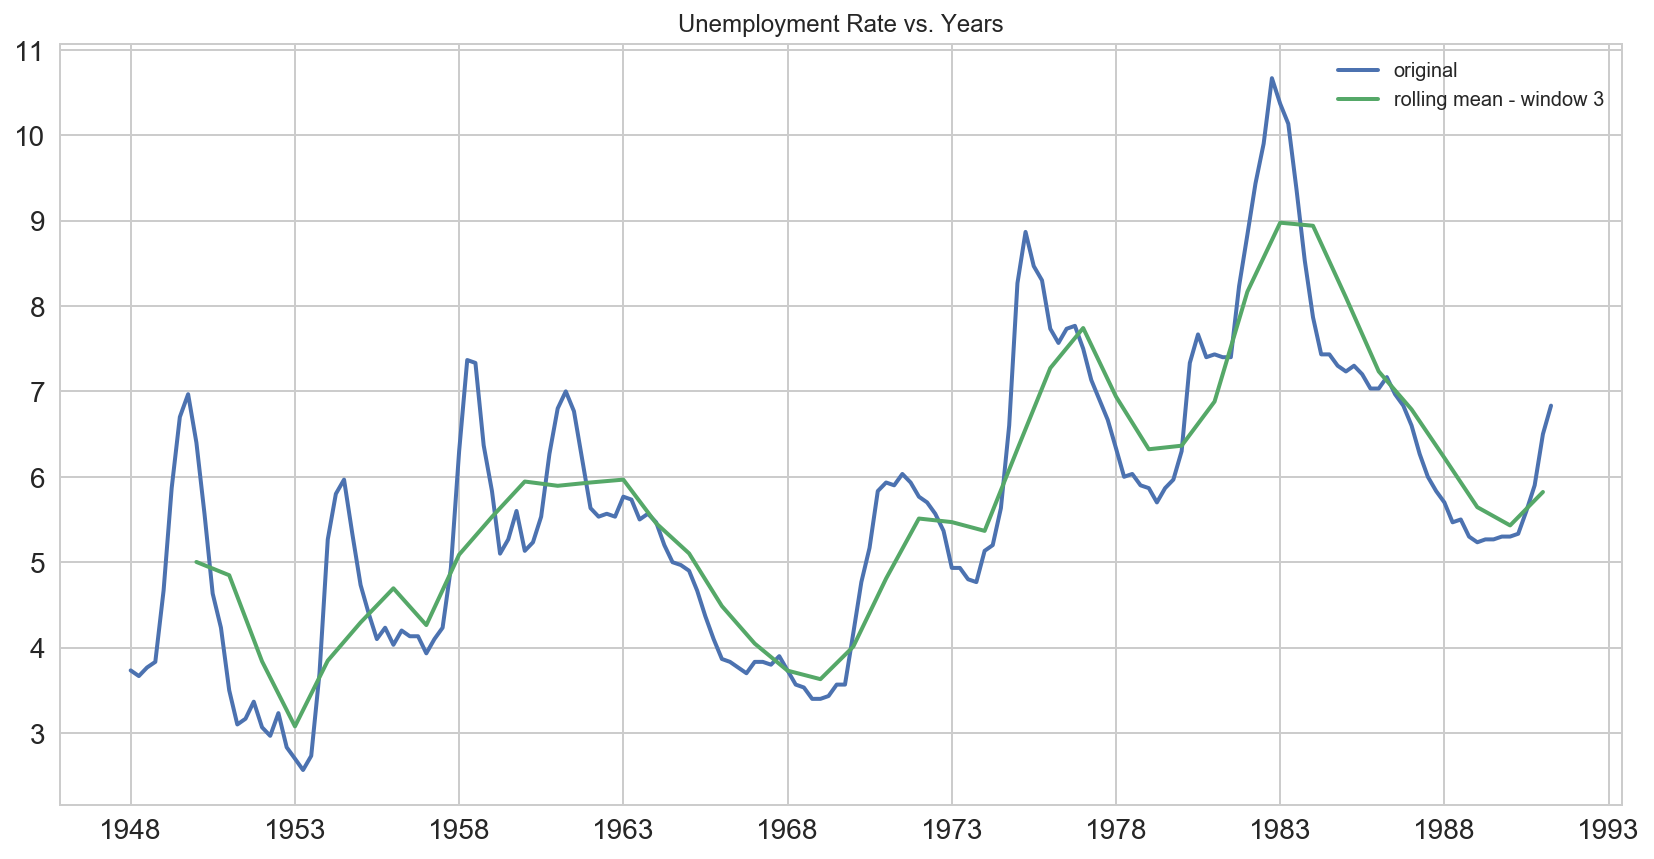

In [45]:
plt.figure(figsize=(14,7))

plt.plot(date_ticks_orig, data.unemployment_rate.values,lw=2, label='original')
plt.plot(date_ticks_roll, yearly.values, lw=2, label = 'rolling mean - window 3')
plt.title("Unemployment Rate vs. Years")
plt.tick_params(labelsize=14)
plt.legend();

In [46]:
# use .rolling and .median to take the following rollowing averages 

# take a rolling average with a window size of 5 , save results to 'uroll_w5'

# take a rolling average with a window size of 15 , save results to 'uroll_w15'

In [16]:
plt.figure(figsize=(14,7))
plt.title("Unemployment Rate vs. Years")
plt.plot(date_ticks_orig, data.unemployment_rate.values,lw=2, label='original')
plt.plot(date_ticks_orig, uroll_w5, lw=2,  label = 'rolling mean - window 5')
plt.plot(date_ticks_orig, uroll_w15, lw=2,  label = 'rolling mean - window 15')
plt.legend()
plt.tick_params(labelsize=14);

---

### Expanding mean

The "expanding mean" simply uses all datapoints up to the current time to calculate the mean, as opposed to a moving window.

In [ ]:
date_ticks = data.index.to_timestamp()

In [ ]:
rolling_mean = data.unemployment_rate.resample('Q').sum().rolling(window=1, center=False).mean()

# create an expanding mean by replace .rolling with .expanding, save result to 'expanding_mean'


In [17]:
plt.figure(figsize=(15,7))
plt.title("Unemployment Rate vs. Years")
plt.plot(date_ticks, rolling_mean, alpha=1, lw=2, label='rolling mean')
plt.plot(date_ticks, expanding_mean, alpha=1, lw=2, label='expanding mean')

plt.legend(loc='upper left')

plt.tick_params(labelsize=14)

---

### Exponentially weighted windows

Exponentially weighted windows are one of the most common and effective ways of averaging out noise in timeseries data. The averaging is done with an "exponential decay" on the contribution of prior means, decreasing the contribution of timepoints further in the past.

The (adjusted) exponentially weighted mean for time $t$ is defined as:

### $$ x_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2x_{t-1} + ... + (1 - \alpha)^{t}x_0} {1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^{t}} $$

See:

http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows


In [49]:
rolling_mean = data.unemployment_rate.resample('Q').sum().rolling(window=2, center=True).mean()

# create an exponentially weighted mean by using the .ewm method


In [18]:
ax = rolling_mean.plot(lw=2.5, figsize=(14,7))
exp_weighted_mean.plot(ax=ax, lw=2.5,title = "Unemployment Rate vs. Years");

---

### "Differencing" a timeseries and stationarity

If a time series is stationary, it's mean, variance, and autocorrelation (which is in the next section) are constant over time. Forcasting methods typically assume that the timeseries you are forcasting for is stationary, or at least approximately stationary.


### Constant Mean 

There is a constant mean $\mu$ throughout the series
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Mean_nonstationary.png)

### Constant Variance 

There is a constant variance $\sigma$ throughout the series
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Var_nonstationary.png)


### Constant Autocorrelation 

There is a constant autocorrelation $\gamma$ throughout the series

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Cov_nonstationary.png)



The most common way to make a timeseries stationary is to perform "differencing". This procedure converts a timeseries into the difference between values:

### $$ \Delta y_t = y_t - y_{t-1} $$

**This removes trends in the timeseries and ensures that the mean across time is zero.** In most cases there will only be a need for a single differencing, although sometimes a second difference (or even more) will be taken to remove trends.

**REPEAT: Differencing removes trends in the timeseries and ensures that the mean across time is zero. **

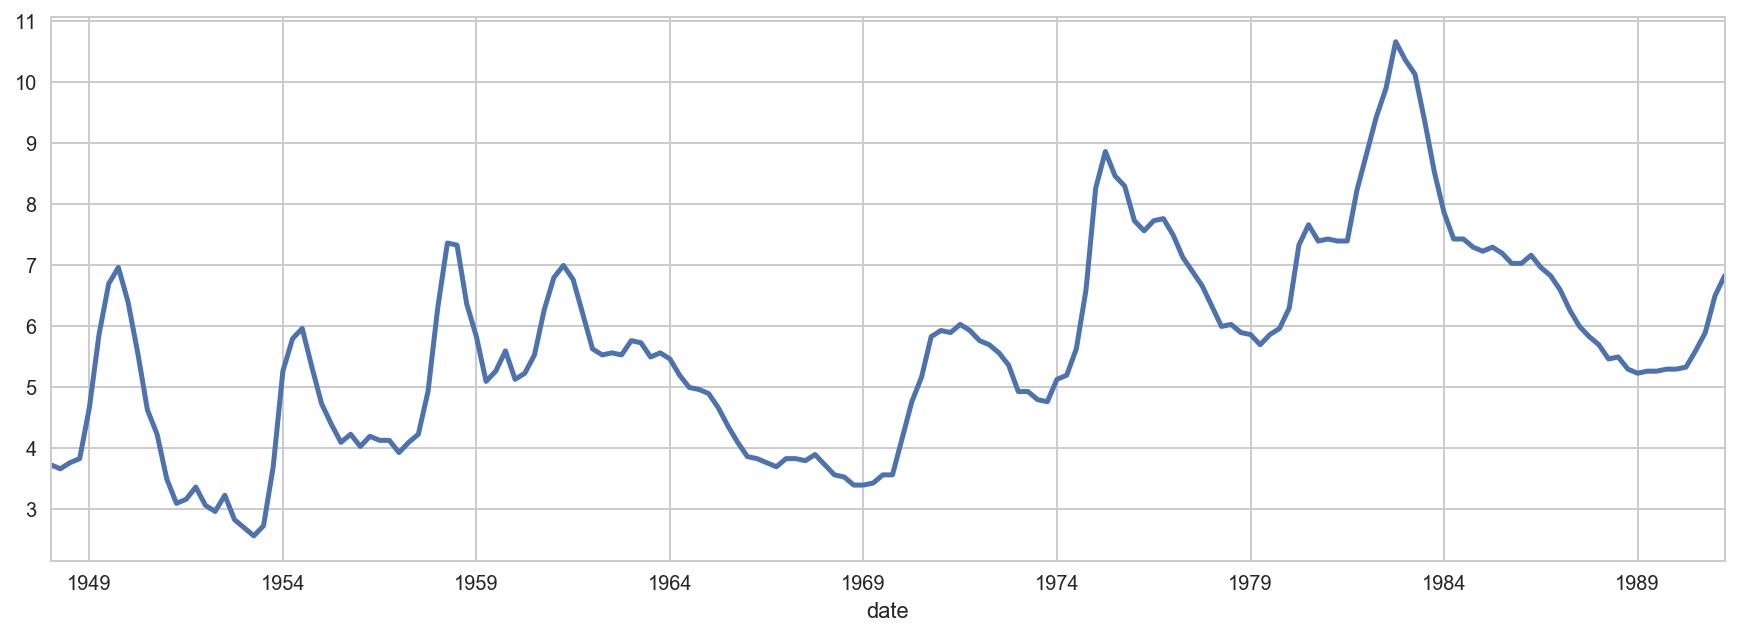

In [51]:
data['unemployment_rate'].plot(lw=2.5, figsize=(15,5));

In [52]:
# take the first difference, use .diff, save result to a new column called 'unemp_diff'

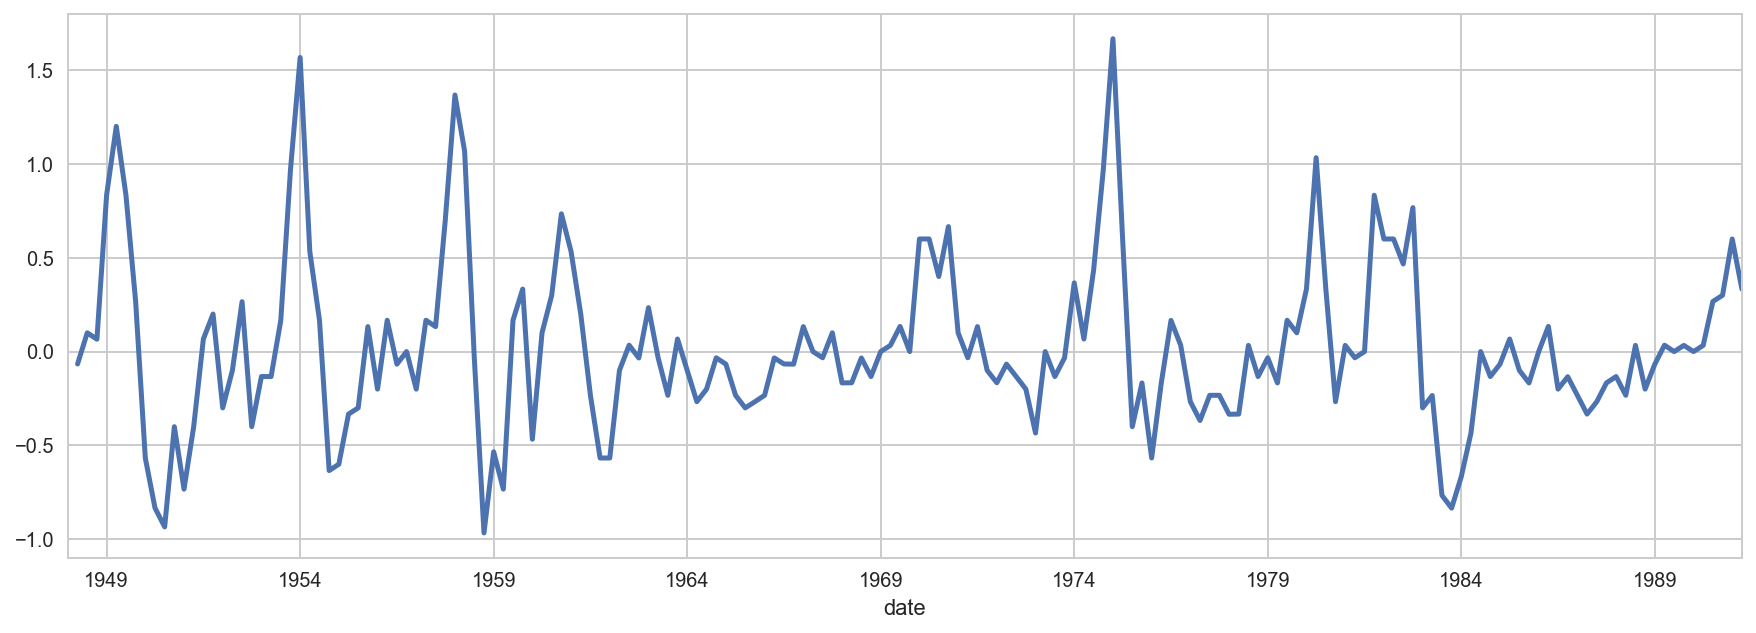

In [53]:
# your result should look something like this
data['unemp_diff'].plot(lw=2.5, figsize=(15,5));

In [56]:
# compare the mean of the original curve with the mean of the differenced curve


---

###  Autocorrelation and the autocorrelation function (ACF)

While in previous weeks, our analyses has been concerned with the correlation between two or more variables (height and weight, education and salary, etc.), in time series data, autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely related earlier values are with values occurring later in time.

Examples of autocorrelation:

    In stock market data the stock price at one point is correlated with the stock 
    price of the point directly prior in time. 
    
    In sales data, sales on a Saturday are likely correlated with 
    sales on the next Saturday and the previous Saturday, as well as other days to more
    or less extent.

Below is the formula for the autocorrelation funtion (acf):

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ at time points } t_1, t_2, t_3 ... t_n:$

### $$lag_k\;acf() = \frac{\sum_{t=k+1}^{n}\left(\;x_t - \bar{x}\;\right)\left(\;x_{t-k} - \bar{x}\;\right)}{\sum_{t=1}^n\left(\;x_t - \bar{x}\;\right)^2}$$

Compare this to the formula for correlation:

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ and measurements } y_1, y_2, y_3 ... y_n:$

### $$r_{xy} = \frac{\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)\left(\;y_{i} - \bar{y}\;\right)}{\sqrt{\left(\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)^2\sum_{i=1}^n\left(\;y_i - \bar{y}\;\right)^2\right)}}$$


**Computing Autocorrelation**

To compute autocorrelation, we fix a lag _k_ which is the delta between the given point and the prior point used to compute the correlation.

With a _k_ value of 1, we'd compute how correlated a value is with the prior one. With a _k_ value of 10, we'd compute how correlated a variable is with one 10 time points earlier.

In [19]:
# For data.unemployment_rate, use the .autocorr Series method to calcualte the autocorelation 

# calculate the autocorrelation for quartly sampled data with a lag of 1, save to 'autocorr_quarter_lag1'

# calculate the autocorrelation for annually sampled data with a lag of 1, save to 'autocorr_year_lag1'



In [58]:
# let's remove the nan's and see how that affects our results 
udiff = data['unemp_diff']
udiff.dropna(inplace=True)

In [20]:
# For data.unemployment_rate, use the .autocorr Series method to calcualte the autocorelation 

# calculate the autocorrelation for quartly sampled data with a lag of 1, save to 'autocorr_quarter_lag1'

# calculate the autocorrelation for annually sampled data with a lag of 1, save to 'autocorr_year_lag1'



In [60]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [61]:
# will need to explian the confidence interval

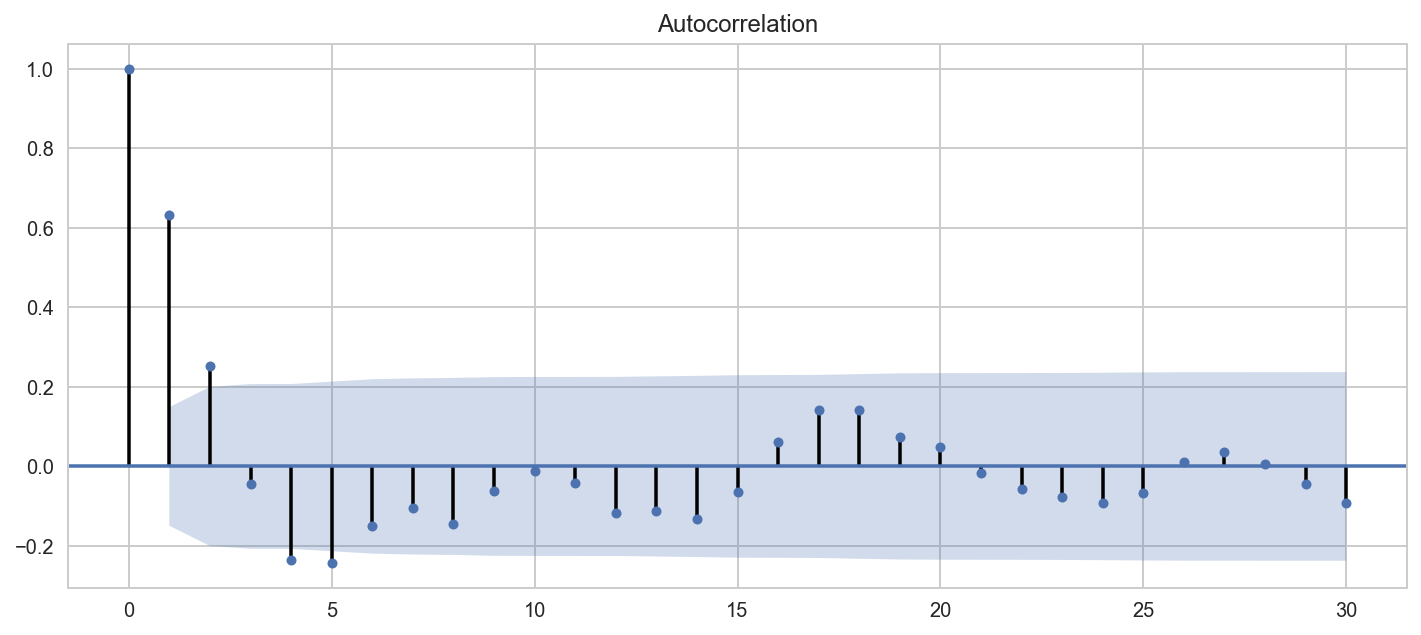

In [62]:
# statistically significant autocorrelation at lag = 2
# statistically insignificant autocorrelation at lag = 3
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(udiff.values, lags=30, ax=ax)
plt.show()

In [23]:
acf(udiff.values)

array([ 1.        ,  0.63319208,  0.25376684, -0.04527462, -0.23647647,
       -0.24250539, -0.14879853, -0.10337859, -0.14509063, -0.06090205,
       -0.01245488, -0.04086133, -0.11617939, -0.11164756, -0.13262784,
       -0.0640504 ,  0.06038665,  0.14181805,  0.14240289,  0.07308443,
        0.04924564, -0.0171425 , -0.05616501, -0.07663316, -0.09109291,
       -0.06616859,  0.0110697 ,  0.03601951,  0.00562426, -0.04455307,
       -0.09262288, -0.0753428 , -0.06326071,  0.00457069,  0.04039064,
        0.08322502,  0.03718346, -0.01489549, -0.03821716, -0.07197122,
       -0.04008023])

---

### Partial autocorrelation and the partial autocorrelation function (PACF)

Another important chart to diagnose your timeseries is the partial autocorrelation chart (PACF). This is similar to the autocorrelation, but instead of just the correlation at increasing lags, it is the correlation at a given lag _controlling for the effect of previous lags._

In [63]:
# will need to explian this

In [64]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

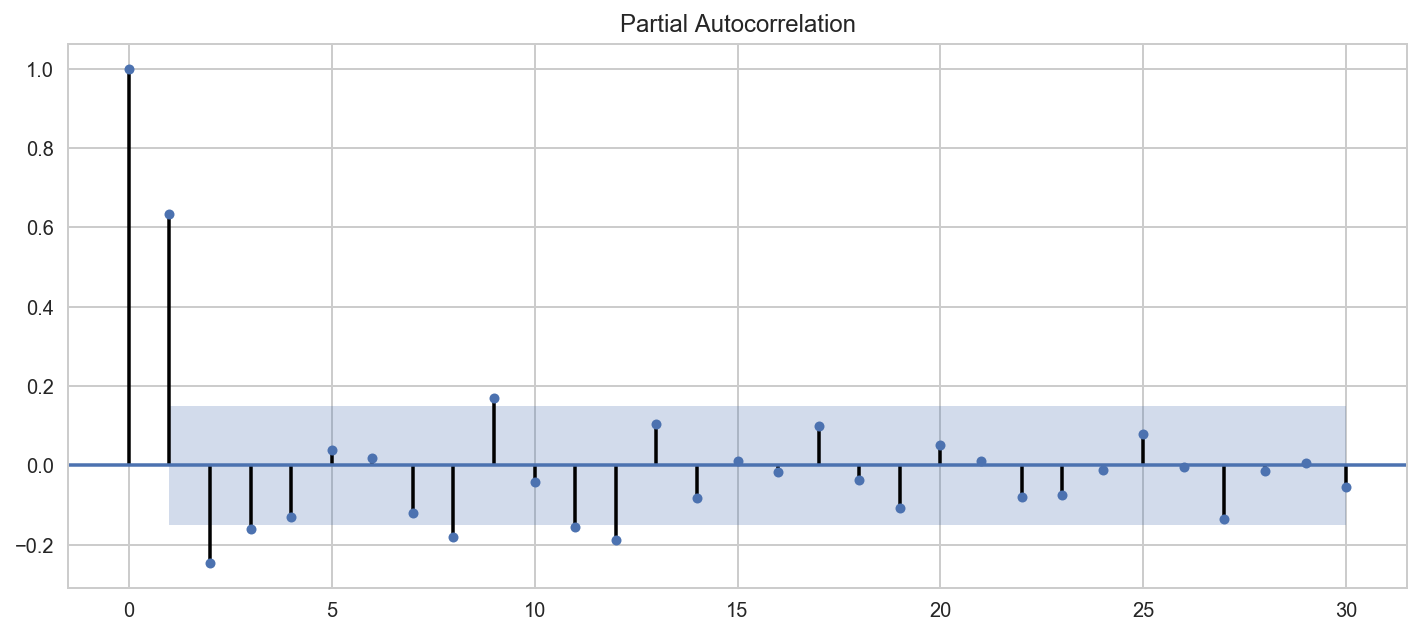

In [65]:
# statistically significant partial autocorrelation at lag = 3
# statistically insignificant partial autocorrelation at lag = 4

fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(udiff.values, lags=30, ax=ax)
plt.show()

In [66]:
pacf(udiff.values)

array([ 1.        ,  0.63687343, -0.25046237, -0.16338187, -0.1333661 ,
        0.04245776,  0.02010538, -0.12664865, -0.19079892,  0.18426472,
       -0.04423723, -0.17011587, -0.2092775 ,  0.1193209 , -0.08912343,
        0.00827057, -0.0247057 ,  0.11811304, -0.04229117, -0.12702726,
        0.05918831,  0.02086846, -0.0981076 , -0.09741299, -0.00858343,
        0.1071147 , -0.01302358, -0.18074319, -0.01418203,  0.02807309,
       -0.07489433, -0.05546641, -0.08215127,  0.11363649, -0.03117569,
       -0.02058898, -0.23796682,  0.03374702,  0.03244562, -0.09744347,
       -0.07423244])

---

### Autoregressive (AR) models

Autoregressive (AR) models use data from previous time-points to predict the next time-point. These are essentially regression models where the predictors are previous timepoints of the outcome.

Typically, AR models are denoted `AR(p)`, where _p_ indicates the number of previous time points to incorporate. `AR(1)` is the most common.

In an autoregressive model we learn regression coefficients on the features that are the previous _p_ values.

### $$y_i = c + \beta_1  y_{i-1} + \beta_2  y_{i-2}\ +\ ...\ +\ \beta_p  y_{i-p}\ +\ \epsilon \\
y_i =\sum_{j=1}^p \beta_j y_{i-j} + \epsilon$$



In [67]:
from statsmodels.tsa.arima_model import ARMA
import pyflux as pf # install --> pip install pyflux

In [ ]:
# q parameter will be explained shortly 
p = 1
q = 0 

In [68]:
ar1 = ARMA(udiff.values, (p, q)).fit()

In [69]:
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                     ARMA(1, 0)   Log Likelihood                 -57.550
Method:                       css-mle   S.D. of innovations              0.337
Date:                Wed, 05 Apr 2017   AIC                            121.100
Time:                        11:19:39   BIC                            130.560
Sample:                             0   HQIC                           124.938
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0202      0.069      0.293      0.770      -0.115       0.155
ar.L1.y        0.6316      0.058     10.799      0.000       0.517       0.746
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5833           +0.0000j            1.5833            0.0000
-----------------------------------------------------------------------------
"""

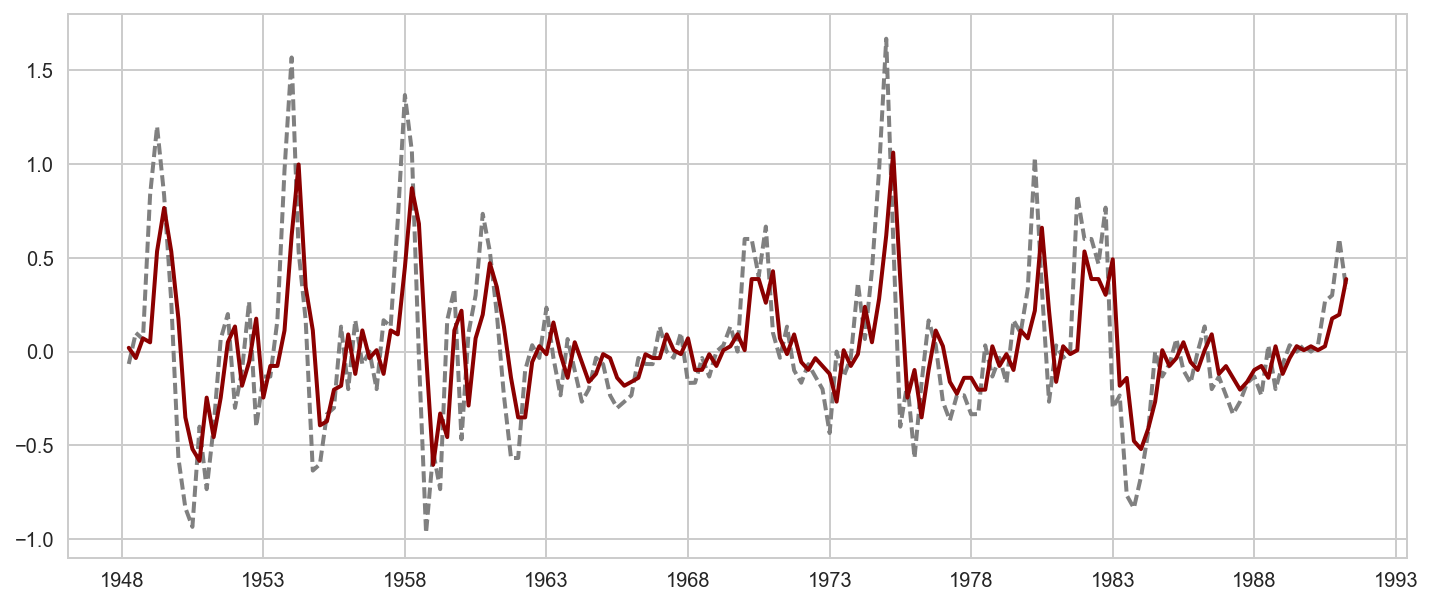

In [70]:
# udiff --> original data with 1st difference apply, so it has zero mean
# ar1.fittedvalues --> values predicted using autogregression 
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], udiff, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], ar1.fittedvalues, lw=2, color='darkred')
plt.show()

In [71]:
from sklearn.metrics import r2_score
r2_score(udiff, ar1.fittedvalues)

0.40213390096069146

In [72]:
data.head(2)

,year_quarter,unemployment_rate,unemp_diff
date,,,
1948Q1,1948Q1,3.733,NaN
1948Q2,1948Q2,3.667,-0.066


In [73]:
pf_ar1 = pf.ARIMA(data=data.dropna().unemp_diff.values, ar=1, ma=0, family=pf.Normal())
pf_ar1_results = pf_ar1.fit("MLE")
pf_ar1_results.summary()

Normal ARIMA(1,0,0)                                                                                       
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 1                                           Log Likelihood: -57.4412                          
End Date: 172                                           AIC: 120.8823                                     
Number of observations: 172                             BIC: 130.3248                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0082     0.0258     0.3176   0.7508   (-0.0423 | 0.0587)       
AR(1)                                

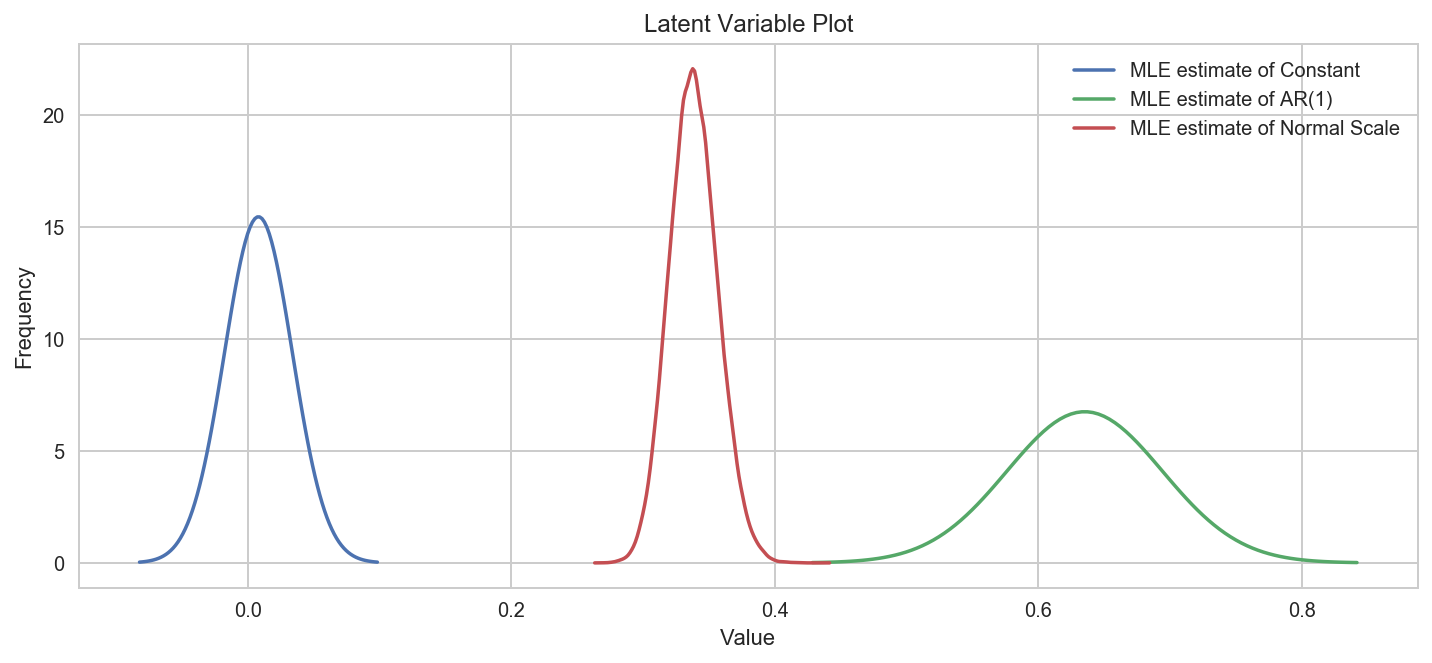

In [74]:
pf_ar1.plot_z(figsize=(12,5))

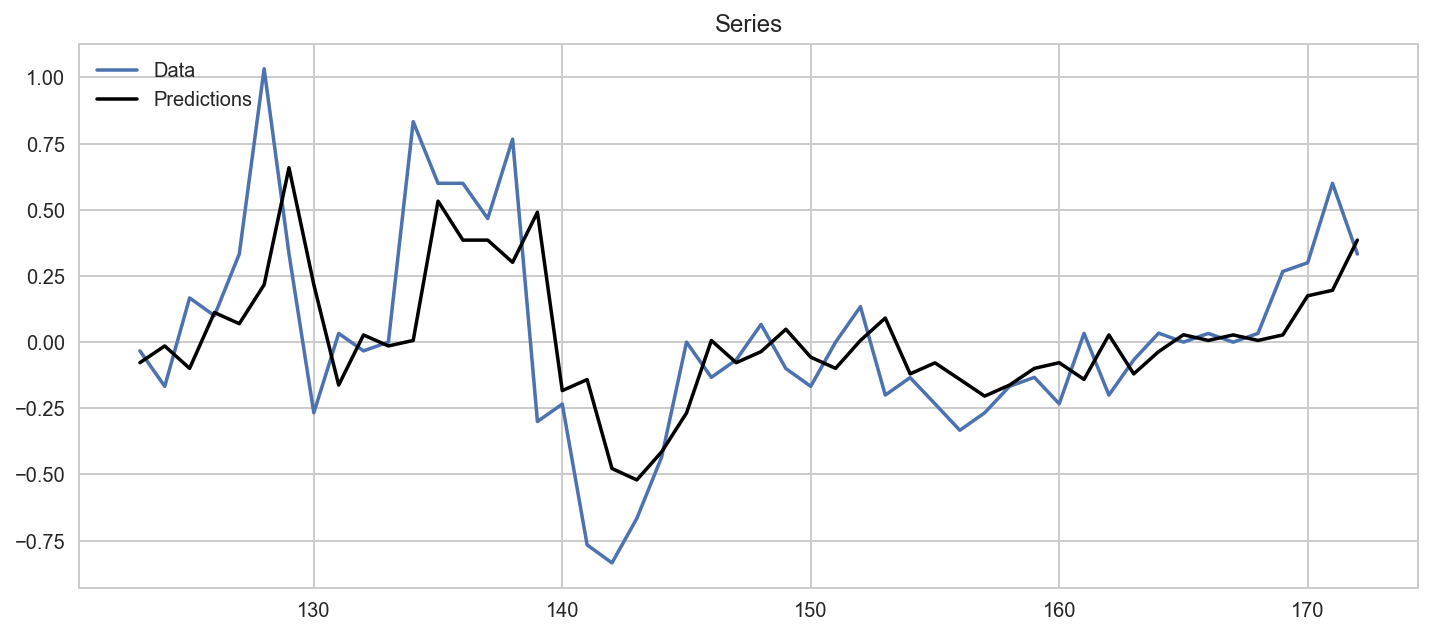

In [80]:
# h is how many steps to forecast
pf_ar1.plot_predict_is(h=50, figsize=(12,5))

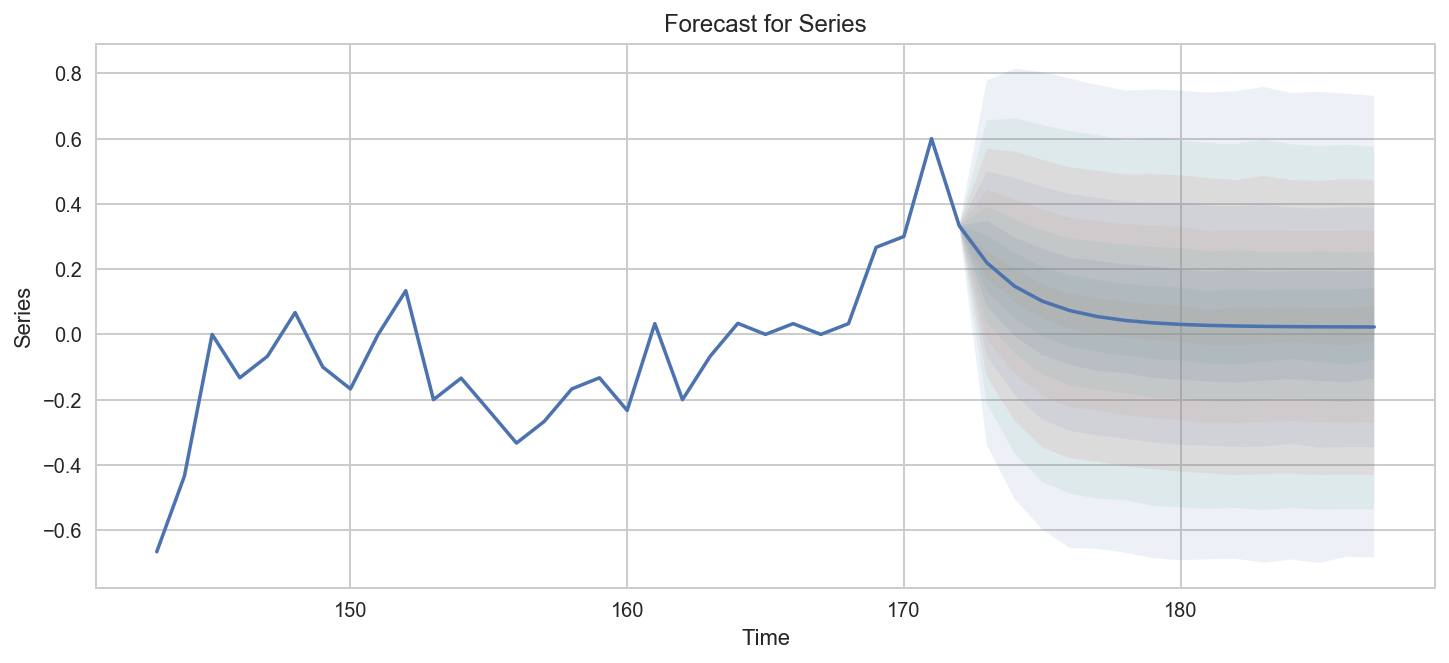

In [85]:
pf_ar1.plot_predict(h=15, past_values=30, figsize=(12,5))

---

### Moving Average (MA) models

**Moving average models** take previous _error terms_ as inputs. They predict the next value based on deviations from previous predictions. This can be useful for modeling a sudden occurrence - like something going out of stock affecting sales or a sudden rise in popularity.

As in autoregressive models, we have an order term, _q_, and we refer to our model as `MA(q)`.  This moving average model is dependent on the last _q_ errors. If we have a time series of sales per week, $y_i$, we can regress each $y_i$ on the last _q_ error terms.

### $$y_t = \epsilon_t + \beta_{1} \epsilon_{t-1} + ... \beta_{n} \epsilon_{t-n} \\
y_t = \sum_{i=1}^n \beta_i \epsilon_{t-i} + \epsilon_t$$

Sometimes the mean of the timeseries is included in the equation:

### $$ y_t = \mu + \sum_{i=1}^n \beta_i \epsilon_{t-i} + \epsilon_t $$

Moving average models are not as trivial to fit as autoregressive models because the error terms are unobserved. [There are a variety of different ways you can estimate the parameters, some of which are covered in this paper.](https://www.it.uu.se/research/publications/reports/2006-022/2006-022-nc.pdf)

In the simpler fitting procedures, a model is iteratively fit, errors are computed, then refit, over and over again until the parameters on the errors converge.

MA includes the mean of the time series. The behavior of the model is therefore characterized by random jumps around the mean value.

In an `MA(1)` model, there is one coefficient on the error of our previous prediction impacting our estimate for the next value in the timeseries.

In [86]:
pf_ma1 = pf.ARIMA(data=data.dropna().unemp_diff.values, ar=0, ma=1, family=pf.Normal())
pf_ma1_results = pf_ma1.fit("MLE")
pf_ma1_results.summary()

Normal ARIMA(0,0,1)                                                                                       
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 1                                           Log Likelihood: -62.6008                          
End Date: 172                                           AIC: 131.2017                                     
Number of observations: 172                             BIC: 140.6442                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0199     0.0426     0.4672   0.6403   (-0.0635 | 0.1033)       
MA(1)                                

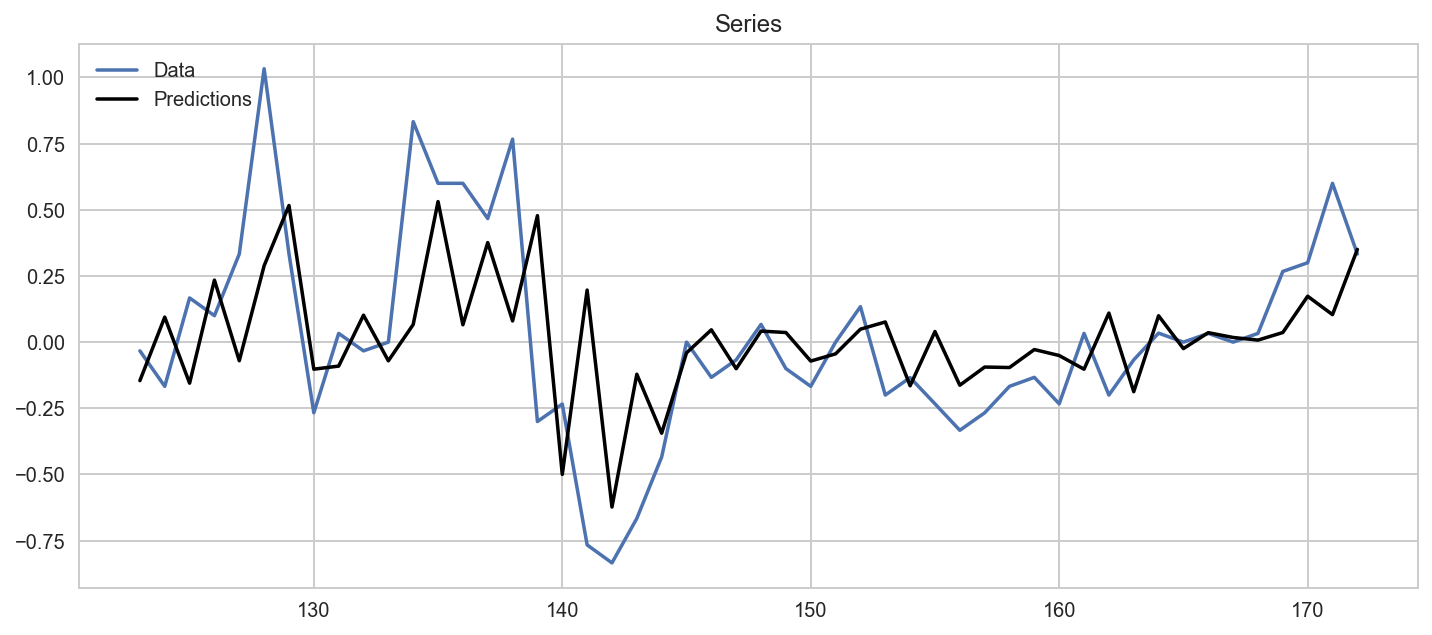

In [87]:
pf_ma1.plot_predict_is(h=50, figsize=(12,5))

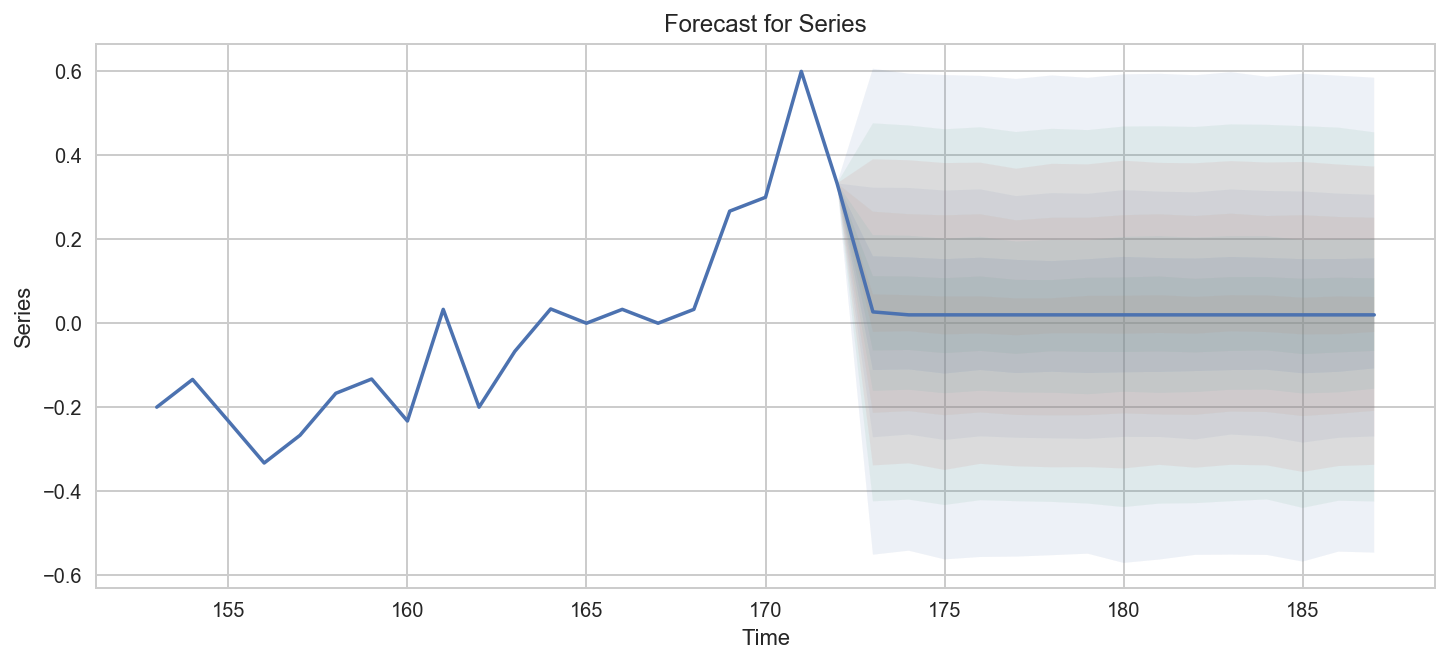

In [88]:
pf_ma1.plot_predict(h=15,past_values=20,figsize=(12,5))

---

## ARMA and ARIMA models

**ARMA** models combine the autoregressive models and moving average models. We combine both, parameterizing the behavior of the model with `p` and `q` terms corresponding to the `AR(p)` model and `MA(q)` model.

Autoregressive models slowly incorporate changes in preferences, tastes, and patterns. Moving average models base their prediction not on the prior value but the prior error, allowing us to correct sudden changes based on random events - supply, popularity spikes, etc.

**ARIMA** is just like the `ARMA(p, q)` model, but instead of predicting the value of the series it predicts the _differenced_ series or changes in the series. The order of differencing is set by an _d_ term as in `ARIMA(p, d, q)`, or alternatively you can just fit an `ARMA(p, q)` model on a differenced timeseries.

Recall the pandas `diff` function. This computes the difference between two consecutive values. In an ARIMA model, we attempt to predict this difference instead of the actual values.

### $$y_t - y_{(t-1)} = ARMA(p, q)$$

Timeseries are assumed to be "stationary" when modeling. This handles the stationarity assumption: instead of detrending or differencing manually, the model does this via the differencing term.

In [89]:
pf_arma1 = pf.ARIMA(data=data.dropna().unemp_diff.values, ar=1, ma=1, family=pf.Normal())
pf_arma1_results = pf_arma1.fit("MLE")
pf_arma1_results.summary()

Normal ARIMA(1,0,1)                                                                                       
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 1                                           Log Likelihood: -53.8512                          
End Date: 172                                           AIC: 115.7024                                     
Number of observations: 172                             BIC: 128.2924                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0108     0.032      0.3377   0.7356   (-0.0519 | 0.0735)       
AR(1)                                

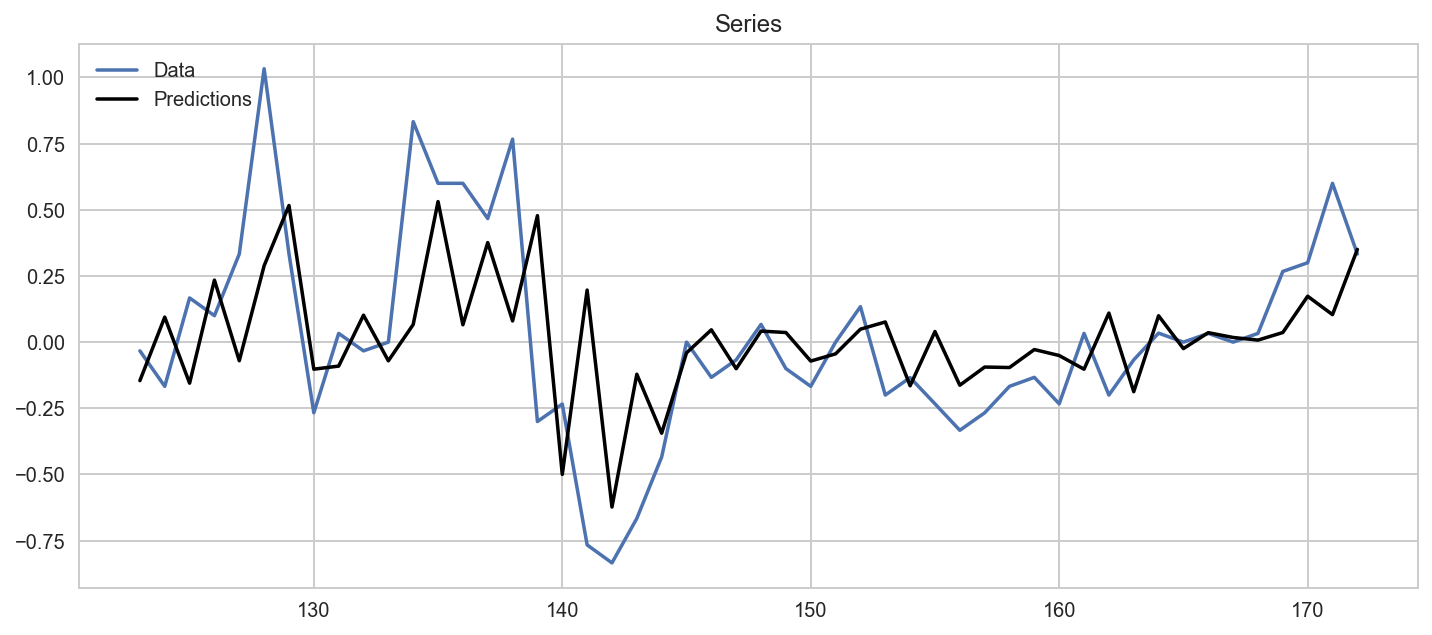

In [90]:
pf_ma1.plot_predict_is(h=50, figsize=(12,5))

In [ ]:
pf_ma1.plot_predict(h=15,past_values=20,figsize=(12,5))

---

### How to choose the right `p` and `q` parameters.

In general it is never a bad idea to choose your parameters based on hold-out testing. That is to say, checking the performance of your model on future timepoints based on different choices of `p` and `q` for an ARIMA model.

However, you can get a sense for what parameters will work best based on the autocorrelation and partial autocorrelation charts.

[This site has a very detailed overview of how to use the acf and pacf to determine your parameters.](https://people.duke.edu/~rnau/411arim3.htm)

In general though, below are some basic guidelines. Remember that these rules apply to the ACF and PACF plots of differenced timeseries rather than the original timeseries (the exception being if your timeseries is stationary and does not require differencing):

1. If the PACF has a sharp cutoff and the lag-1 ACF value is positive then choose an AR(x) term where x is the lag in the PACF after the cutoff.
2. If the ACF has a sharp cutoff and the lag-1 ACF value is negative, choose an MA(x) term where x is the lag in the ACF after the cutoff.
3. If both the ACF and PACF show a gradual decay, and ARMA model is likely appropriate as opposed to the AR or MA alone.

Context 1 above corresponds to timeseries that are "underdifferenced" as indicated by a positive autocorrelation at lat 1. Likewise, context 2 is "overdifferenced" as indicated by the negative autocorrelation.

In general, you should try to choose an AR or MA model alone as opposed to an ARMA model. The AR and MA terms can work against each other in the model and create an overly-complex representation.

----


![](https://research.fb.com/wp-content/themes/fb-research/images/branding/fb-research-logo-2x.png)





![](https://research.fb.com/wp-content/uploads/2017/02/prophet-icon-hero.jpg)


# Prophet |  forecasting at scale


Forecasting is a data science task that is central to many activities within an
organization. For instance, large organizations must engage in capacity planning to effciently allocate scarce resources and goal setting in order to measure
performance relative to a baseline. Producing high quality forecasts is not an
easy problem for either machines or for most analysts. We have observed two
main themes in the practice of creating business forecasts:

1. Completely automatic forecasting techniques can be brittle and they are
often too in
exible to incorporate useful assumptions or heuristics.
2. Analysts who can produce high quality forecasts are quite rare because
forecasting is a specialized data science skill requiring substantial experi-
ence.

---


Prophet uses a decomposable time series model with three
main model components: growth, seasonality, and holidays. They are combined
in the following equation:


$$ y(t) = g(t) + s(t) + h(t) + \epsilon_t  $$


$g(t)$ represents our growth function which models non-periodic changes
in the value of the time series

$s(t)$ represents periodic changes due to weekly
or yearly seasonality

$h(t)$ represents the eects of holidays which occur on
potentially irregular schedules over one more days. 

$\epsilon_t  $ is the error term, it represents
any idiosyncratic changes which are not accommodated by our model


----

![](https://research.fb.com/wp-content/uploads/2017/02/image-2.png?w=884)


Prophet is framing the forecasting problem as a curve-fitting exercise,
which is inherently different from time series models that explicitly account
for the temporal dependence structure in the data. 

Althoguh Prophet gives up some 
important inferential advantages of using a generative model such as an ARIMA,
this formulation provides a number of practical advantages:

1. The formulation is 
exible: we can easily accommodate seasonality with
multiple periods and different assumptions about trends.
2. Unlike with ARIMA models, the time series measurements need not have
a regular period and we do not need to interpolate missing values to fit.
3. Fitting is very fast, allowing the analyst to interactively explore many
model specifications.
4. The forecasting model has easily interpretable parameters that can be
changed heuristically by the analyst to impose assumptions on the fore-
cast.

In [ ]:
# you'll need to install prophet --> pip install fbprophet
from fbprophet import Prophet

We are going to use Prophet to forcast unemployment numbers. Below is a plot of the original data set, before any differencing or averages are taken. So this data is not stationary. But that's ok, because Prophet operates differently than other time series models like ARMIA. 

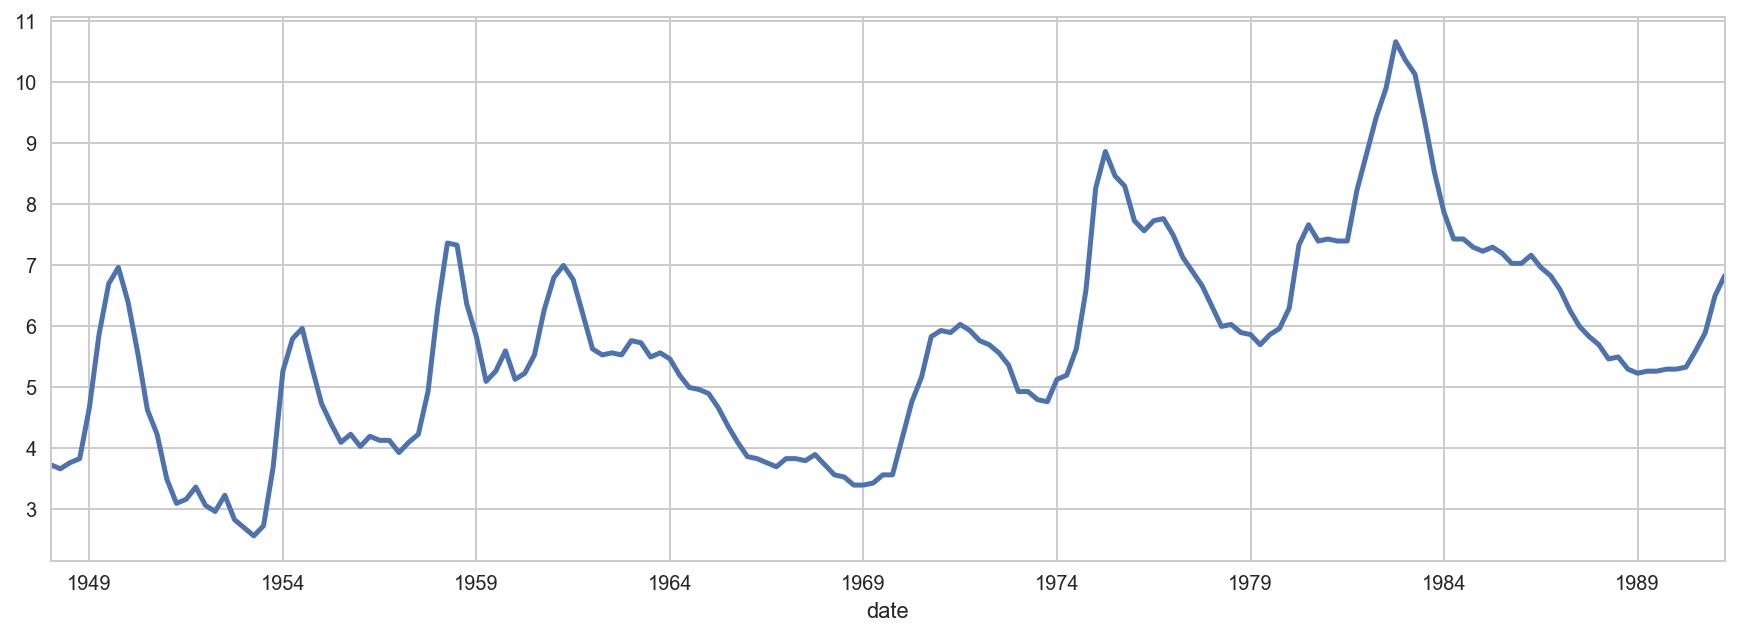

In [233]:
data['unemployment_rate'].plot( lw=2.5, figsize=(15,5));

In [94]:
data.head()

,year_quarter,unemployment_rate,unemp_diff
date,,,
1948Q1,1948Q1,3.733,NaN
1948Q2,1948Q2,3.667,-0.066
1948Q3,1948Q3,3.767,0.100
1948Q4,1948Q4,3.833,0.066
1949Q1,1949Q1,4.667,0.834


data.shape

Prophet accepts data with two features $ds$ for datestamp and $y$ for the value that we wish to forcast. 

In [179]:
# let's create a new datafarme with the columns, ds and y as save it fo 'df'

In [180]:
# now lets populate our new dataframe with data

# use data.year_quarter to populate ds

# use data.unemployment_rate to populate y


In [198]:
# your results should look something like this
df.head()

,ds,y
0,1948Q1,4.167
1,1948Q2,4.767
2,1948Q3,5.167
3,1948Q4,5.833
4,1949Q1,5.933


In [182]:
# create a Prophet object

# call the fit method by passing in our new Prophet ready dataframe 


We need to create a "future" dataframe to pass into the predict method. This dataframe will be populated with future dates on which to predict values. 

Call the *make_future_dataframe * method to create this dataframe. 

In [ ]:
# make_future_dataframe takes two parameters 'periods' and 'freq'
# freq can be D -> Dayly, M -> Monthly, Q -> Quartly, A -> Anually
# periods is how many periods into the future do you want Prophet to forcast


In [227]:
# output should look like this 
future.tail()

,ds
97,1972-03-31
98,1972-06-30
99,1972-09-30
100,1972-12-31
101,1973-03-31


In [228]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
97,1972-03-31,4.794433,3.652227,6.003572
98,1972-06-30,4.541836,3.433562,5.763457
99,1972-09-30,4.465538,3.322333,5.584680
100,1972-12-31,3.549460,2.434810,4.820476
101,1973-03-31,4.315686,3.119127,5.521900


In [ ]:
# use the prophet object to plot your forecast 


----

# Additional Resources 

[**Time Series Analysis and Its Applications**](http://db.ucsd.edu/static/TimeSeries.pdf)is a great textbook for learning time series analysis. 

[**Time Series Analysis Jupyter Notebook Tutoiral**](Time-Series-Analysis-Supplemental.ipynb) This notebook has implements some of the concepts introduced in the above mentioned text with examples, plots, and simulations. 

[**Facebook's Prophet Docs**](https://research.fb.com/prophet-forecasting-at-scale/) These are the docs that Facebook released to accompany the Prophet package. 

[**Facebook's White Paper on Prophet**](https://facebookincubator.github.io/prophet/static/prophet_paper_20170113.pdf)This article explains Prophet in greater depth than the package docs. 